# Kernel SVM 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('star_classification.csv')
X = dataset.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 14, 15, 16, 17]].values
y = dataset.iloc[:, 13].values
print(X)
print(y)

[[1.35689107e+02 3.24946318e+01 2.38788200e+01 ... 5.81200000e+03
  5.63540000e+04 1.71000000e+02]
 [1.44826101e+02 3.12741849e+01 2.47775900e+01 ... 1.04450000e+04
  5.81580000e+04 4.27000000e+02]
 [1.42188790e+02 3.55824442e+01 2.52630700e+01 ... 4.57600000e+03
  5.55920000e+04 2.99000000e+02]
 ...
 [2.24587407e+02 1.57007074e+01 2.11691600e+01 ... 2.76400000e+03
  5.45350000e+04 7.40000000e+01]
 [2.12268621e+02 4.66603653e+01 2.53503900e+01 ... 6.75100000e+03
  5.63680000e+04 4.70000000e+02]
 [1.96896053e+02 4.94646428e+01 2.26217100e+01 ... 7.41000000e+03
  5.71040000e+04 8.51000000e+02]]
['GALAXY' 'GALAXY' 'GALAXY' ... 'GALAXY' 'GALAXY' 'GALAXY']


In [3]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #obtaining training and test sets

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
x_test = sc.fit_transform(x_test)
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [5]:
from sklearn.svm import SVC 
classifier = SVC(kernel ='rbf', random_state = 0) #from above, we just switch to rbf instead of linear
classifier.fit(X_train, y_train) 

SVC(random_state=0)

In [6]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [2 2]]


In [7]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred) #usually evaluated on test set
print(cm)
accuracy_score(y_test, y_pred)

[[11115   502   234]
 [  410  3413    12]
 [  509     0  3805]]


0.91665

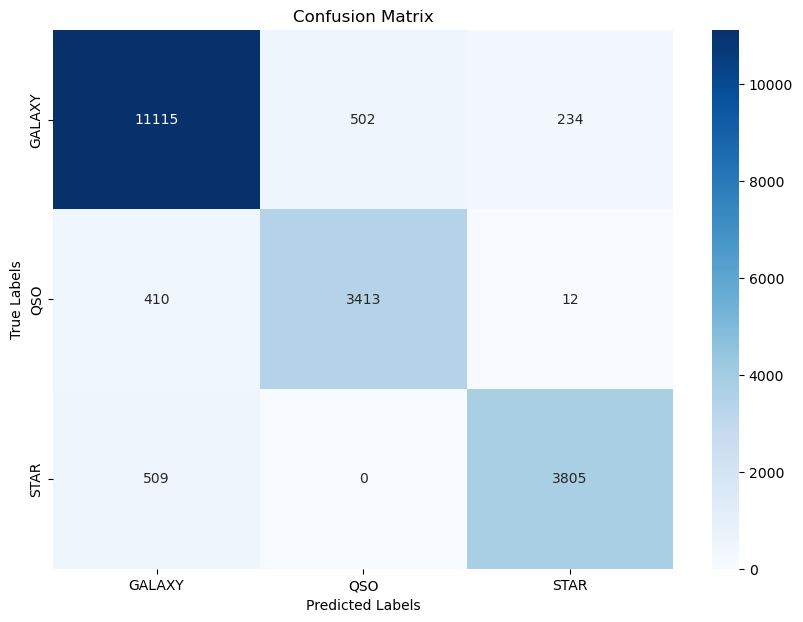

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     11851
           1       0.87      0.89      0.88      3835
           2       0.94      0.88      0.91      4314

    accuracy                           0.92     20000
   macro avg       0.91      0.90      0.91     20000
weighted avg       0.92      0.92      0.92     20000



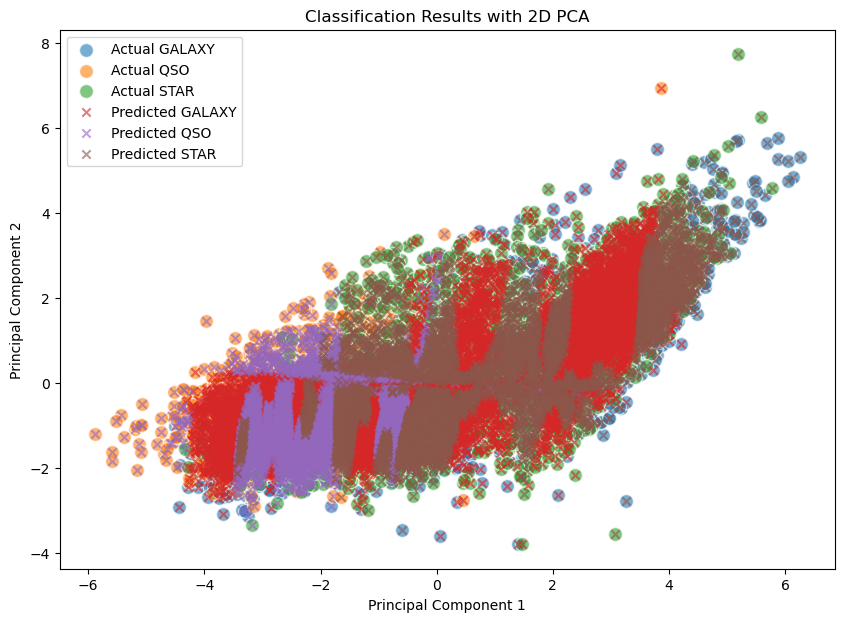

In [9]:
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

# Assuming class names for labels 0, 1, 2
class_names = {'GALAXY': 0, "QSO":1, "STAR":2}
class_names_for_legend = {0:'GALAXY' , 1:"QSO", 2:"STAR"}

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[i for i in np.unique(y)], yticklabels=[i for i in np.unique(y)])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report for more detailed metrics
print(classification_report(y_test, y_pred))

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(x_test)

# Retrain the classifier with reduced dimensions
classifier_2d = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier_2d.fit(X_train_2d, y_train)

# Predict with reduced dimensions
y_pred_2d = classifier_2d.predict(X_test_2d)

# Plot the results with legends
plt.figure(figsize=(10, 7))

# Plot actual labels
for label in np.unique(y_test):
    plt.scatter(X_test_2d[y_test == label, 0], X_test_2d[y_test == label, 1], 
                label=f'Actual {class_names_for_legend[label]}', alpha=0.6, edgecolors='w', s=100)

# Plot predicted labels
for label in np.unique(y_pred_2d):
    plt.scatter(X_test_2d[y_pred_2d == label, 0], X_test_2d[y_pred_2d == label, 1], 
                marker='x', label=f'Predicted {class_names_for_legend[label]}', alpha=0.6)

plt.title('Classification Results with 2D PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best')
plt.show()